In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.eddy_feedback as ef 

In [3]:
# jra55
ds = xr.open_mfdataset('/home/users/cturrell/documents/eddy_feedback/daily_datasets/jra55_djf_ep.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 5325, lon: 144, lat: 73, level: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01T09:00:00 ... 2016-12-31T09:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    v        (time, level, lat, lon) float32 dask.array<chunksize=(1, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(1, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(1, 37, 73, 144), meta=np.ndarray>
    u        (time, level, lat, lon) float32 dask.array<chunksize=(1, 37, 73, 144), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(1, 37, 73), meta=np.ndarray>
    ubar     (level, lat) float32 dask.array<chunksize=(37, 73), meta=np.ndarray>

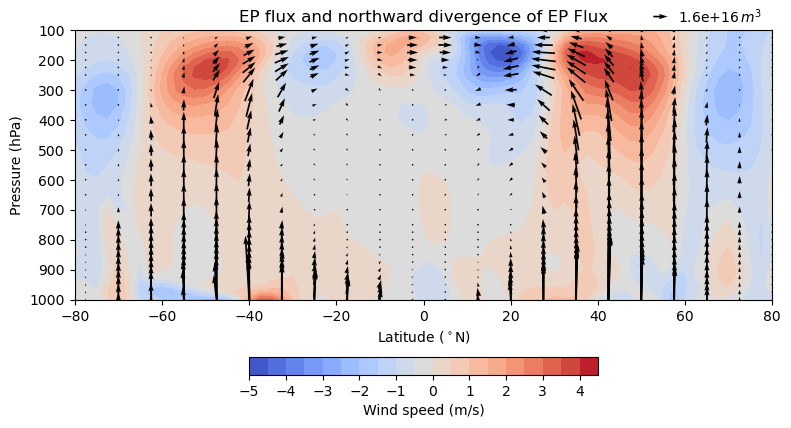

In [4]:
ef.plot_epfluxes(ds)

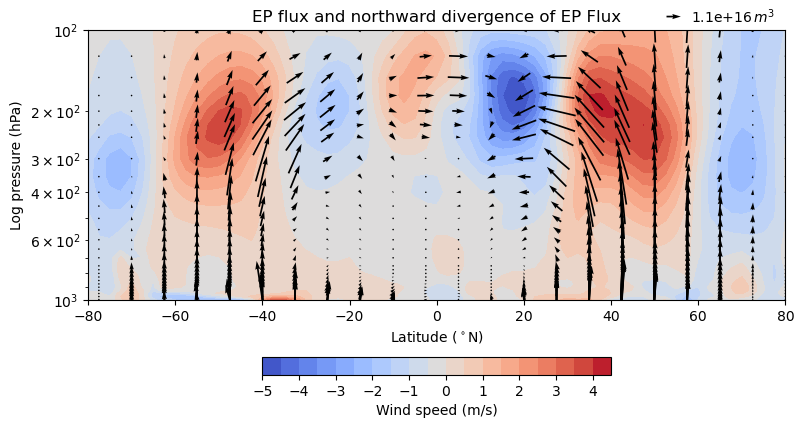

In [5]:
ef.plot_epfluxes(ds, yscale='log')

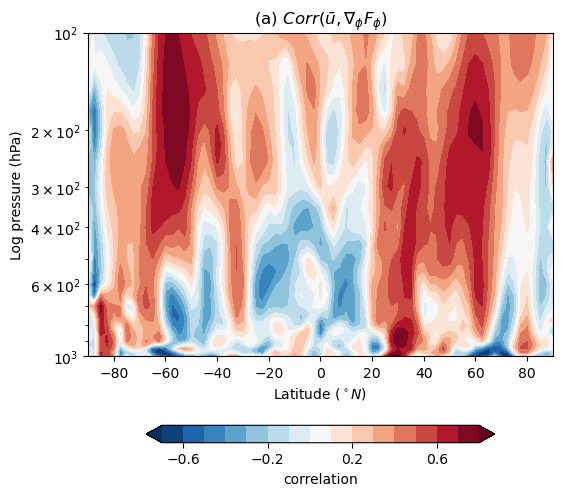

In [7]:
ef.correlation_contourf(ds, show_rect=False)

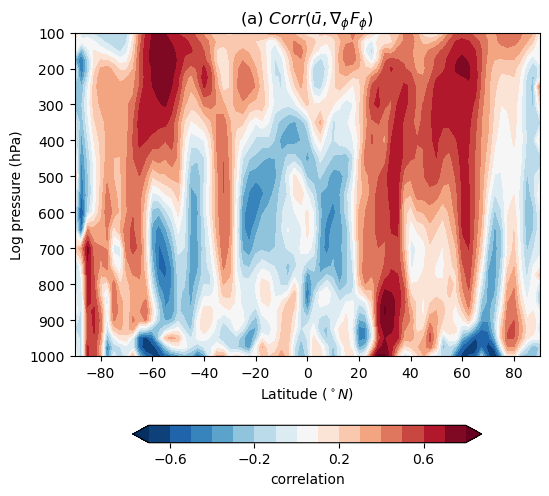

In [8]:
ef.correlation_contourf(ds, show_rect=False, logscale=False)

In [31]:
def correlation_contourf(ds, show_div2=False, logscale=True, show_rect=True, plot_zonal=False):
    
    """"
    Input: dataset that contains ep fluxes data
            - with variables: (time, level, lat, lon)
    
    Output: contourf plot matching Fig.6 in Smith et al., 2022
    """
        
    ds = ds.isel(dict( level=slice(10,37) ))
        
    # set variables and save them
    ubar = ds.u.mean(('lon'))
    div1 = ds.div1
    div2 = ds.div2
    
    # separate time into annual means
    ubar = ubar.groupby('time.year').mean('time').load()
    div1 = div1.groupby('time.year').mean('time').load()
    div2 = div2.groupby('time.year').mean('time').load()
    
    # choose which variable; default: div1
    if show_div2==True:
        corr = ef.correlation_array(ubar, div2)
        title_name = '\\nabla_p F_p'
        figgy = (6,7)
    else:
        corr = ef.correlation_array(ubar, div1)
        title_name = '\\nabla_{\\phi} F_{\\phi}'
        figgy = (6,6)
        
    import matplotlib.patches as patches

    plt.figure(figsize=figgy)

    plt.contourf(ds.lat.values, ds.level.values, corr, cmap='RdBu_r', levels=15,
             extend='both')
    plt.colorbar(location='bottom', orientation='horizontal', shrink=0.75, label='correlation',
             extend='both', ticks=[-0.6,-0.2,0.2,0.6])
    plt.gca().invert_yaxis()
    
    if logscale==True:
        plt.yscale('log')
        
    if plot_zonal == True:
        ubarbar = ds.u.mean(('time', 'lon'))
        plt.contour(ds.lat.values, ds.level.values, ubarbar,
                    levels=11, colors='black')

    plt.xlabel('Latitude $(^\\circ N)$')
    plt.ylabel('Log pressure (hPa)')
    plt.title('(a) $Corr(\\bar{{u}}, {0})$'.format(title_name))

    if show_rect == True:
        rect = patches.Rectangle((25., 600.), 50, -400, 
                         fill=False, linewidth=2)
        plt.gca().add_patch(rect)

    plt.show()

In [32]:
ubar = ds.u.mean(('lon', 'time'))

ubar = ubar.isel( dict(level=slice(10,37)) )

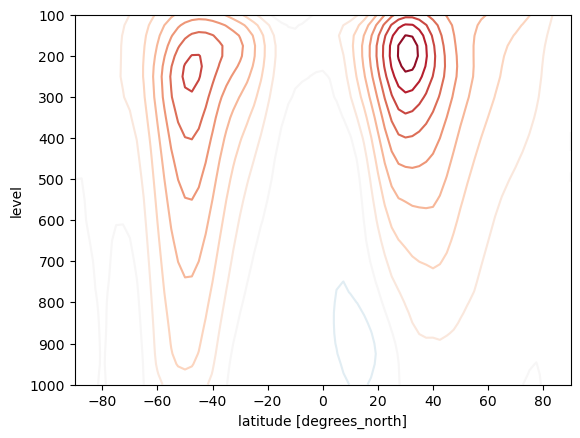

In [33]:
ubar.plot.contour(yincrease=False, levels=21)

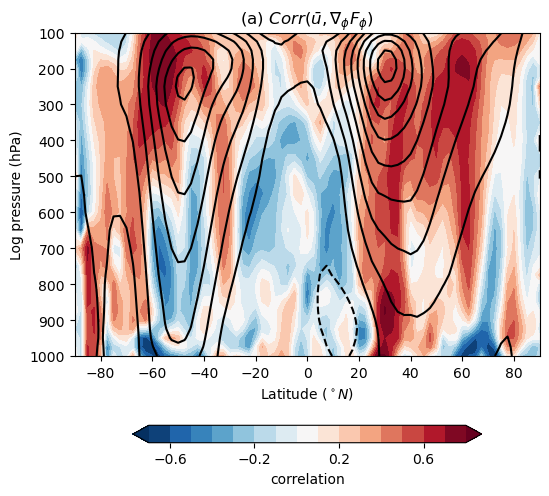

In [34]:
correlation_contourf(ds, plot_zonal=True, show_rect=False, logscale=False)

But no quite accurate because the correlation is a yearly mean, whereas ubar is all-time mean